In [179]:
%%html
<style type="text/css">
input.good:checked + label {color: green}
input.bad:checked + label {color: red}
input.good:checked + label::after {color: green; content: ' Õige vastus!'}
input.bad:checked + label::after {color: red; content: ' Vale vastus!'}

.output_wrapper, .output {
    height:auto !important;
    max-height:10000px;
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

# Kaos dünaamilises piljardis

Dünaamiline piljard on süsteem mis kirjeldab hõõrdevaba punktosake liikumist potentsiaalivabas piirkonnas, mis on piiratud lõpmatu potentsiaali seintega, kus tekib tagasi põrkamine.

## Dünaamilise piljardi mõisted

Dünaamiline piljard on süsteem, mis kirjeldab hõõrdevaba punktmassi liikumist potentsiaalvabas piirkonnas $\mathcal{D} \subset \mathbb{R}^2$, mis on piiratud lõpmatu potentsiaaliseinaga $\partial\mathcal{D} = \Gamma$. Seega võime dünamikat kirjeldada kahe osana. Seinalt eemal mass liigub vabalt, seega kehtib

$$\dot{\vec{q}} = \vec{v}\,, \quad \dot{\vec{v}} = 0\,,$$

kus $\vec{q}$ on massi asukoht ja $\vec{v}$ on tema kiirus. Seinal $\Gamma$ toimub elastiline kokkupõrge, mille järel massi liikumise suund äkitselt muutub. Seda kirjeldab hüpe

$$\vec{q} \mapsto \vec{q}\,, \quad \vec{v} \mapsto \vec{v} - 2(\vec{v} \cdot \vec{n})\vec{n}\,,$$

kus $\vec{n}$ on seina ühiknormaal, ja me kasutame konventsiooni et $\vec{n}$ näitab piljardlaua sisse. Siin on näha et mõlemal juhul $\|\vec{v}\|$ jääb konstantseks, seega võime kasutada ühikkiirust $\|\vec{v}\| = 1$ ja kasutada faasiruumi koordinaate $(x, y, \omega)$ nii et

$$\vec{q} = (x, y)\,, \quad \vec{v} = (\cos\omega, \sin\omega)\,.$$

Selle alusel leiame, et faasiruum on $\mathcal{D} \times S^1$. Kui me lisaks defineerime relatsiooni

$$(\vec{q}, \vec{v}) \sim (\vec{q}', \vec{v}') \quad \Leftrightarrow \quad \vec{q} = \vec{q}' \in \Gamma \wedge \vec{v}' = \vec{v} - 2(\vec{v} \cdot \vec{n})\,,$$

võime defineerida faasiruumi kui $Q = \mathcal{D} \times S^1 / \sim$, ja pideva süsteemi dünaamikat kirjeldab esimest järku diferentsiaalvõrrand.

Pidevast süsteemist on võimalik tuletada diskreetset süsteemi Poincaré lõike abil. Antud juhul leiame, et võimalik Poincaré lõige on

$$S = \Gamma \times S^1 / \sim$$

ja koosneb faasiruumi punktidest kus toimub kokkupõrge seinaga. Poincaré kujutus $P: S \to S$ kirjeldab, kuidas järgnevad kokkupõrked on omavahel seotud. Selle funktsiooni kirjeldamiseks on kasulik defineerida koordinaate lõikel $S$. Kõigepealt defineerime koordinaati $r$ rajal $\Gamma$, mille abil me saame igat rajapunkti kirjeldada kui $\vec{f}(r) \in \Gamma \subset \mathbb{R}^2$. Selle abil saame defineerida puutujavektorit $\vec{t} = \frac{d\vec{f}}{dr}$, ja kui me valime $r$ selliseks et ta kirjeldab kaarepikkust, on $\|\vec{t}\| = 1$. Lisaks defineerime koordinaati $\varphi$ nii, et punktmassi kiirus pärast kokkupõrget avaldub kui

$$\vec{v} = \vec{n}\cos\varphi + \vec{t}\sin\varphi\,.$$

Edaspidi kasutame koordinaate $(r, \varphi)$ erinevate piljardsüsteemide kirjeldamiseks. Süsteemi defineerime kahe funktsiooni kaudu:

* Rajakujutus $\vec{f}: [r_1, r_2] \to \mathbb{R}^2$ kirjeldab kus asub piljardlaua raja.
* Kokkupõrkekujutus $P: [r_1, r_2] \times [-\pi/2, \pi/2] \to [r_1, r_2] \times [-\pi/2, \pi/2]$, ehk Poincaré kujutus, kirjeldab seost kahe järgneva kokkupõrke vahel.

## Kasulikud Pythoni funktsioonid

Arvutamiseks kasutame NumPy, joonistamiseks kasutame PyPlot ja erinevaid graafika pakette.

In [42]:
%matplotlib inline

from PIL import Image
import IPython.display as disp
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

plt.rc('figure', figsize=(10, 10))

Lisaks defineerime abifunktsiooni, et kuvata tulemusi vikerkaare värvides.

In [36]:
def rcolor(x):
    k = np.floor(1530 * x) % 1530
    r = np.maximum(0, np.minimum(255, 510 - np.abs(k - 1020)))
    g = np.maximum(0, np.minimum(255, 510 - np.abs(k - 510)))
    b = np.maximum(0, np.minimum(255, np.abs(k - 765) - 255))
    return (r, g, b)

Järgnev abifuntsioon simuleerib $n$ kokkupõrget alustades algtingimusest $(r_0, \varphi_0)$.

In [235]:
def bounce(fcm, fxy, r0, phi0, n):
    res = [[r0, phi0]]
    r = r0
    phi = phi0

    for _ in range(n):
        [r, phi] = fcm(r, phi)
        res.append([r, phi])

    cm = np.array(res)
    xy = np.transpose(fxy(cm[:, 0]))
    
    return [cm, xy]

Lõpuks defineerime funktsiooni kokkupõrkekujutuse joonistamiseks.

In [68]:
def collmap(fcm, rmin, rmax, nr, nphi):
    r0 = np.linspace(rmin, rmax, nr)
    phi0 = np.linspace(-np.pi / 2, np.pi / 2, nphi)

    cm = np.array([fcm(r, phi) for r in r0 for phi in phi0]).reshape(nr, nphi, 2)

    cr = np.moveaxis(np.array(rcolor((cm[:, :, 0] - rmin) / (rmax - rmin)), dtype=np.uint8), 0, 2)
    cphi = np.moveaxis(np.array(rcolor((cm[:, :, 1] / np.pi) + 0.5), dtype=np.uint8), 0, 2)

    b = BytesIO()
    imr = Image.fromarray(cr)
    imr.save(b, format='png')
    disp.display_png(b.getvalue(), raw=True)

    b = BytesIO()
    imr = Image.fromarray(cphi)
    imr.save(b, format='png')
    disp.display_png(b.getvalue(), raw=True)

## Näited

### Ring

Kõige lihtsam piljardlaud on ümmargune. Rajakujutust võib defineerida kui

$$x = \cos r\,, \quad y = \sin r\,,$$

kus $r \in [-\pi, \pi]$:

In [231]:
def xy_circle(r):
    x = np.cos(r)
    y = np.sin(r)
    return [x, y]

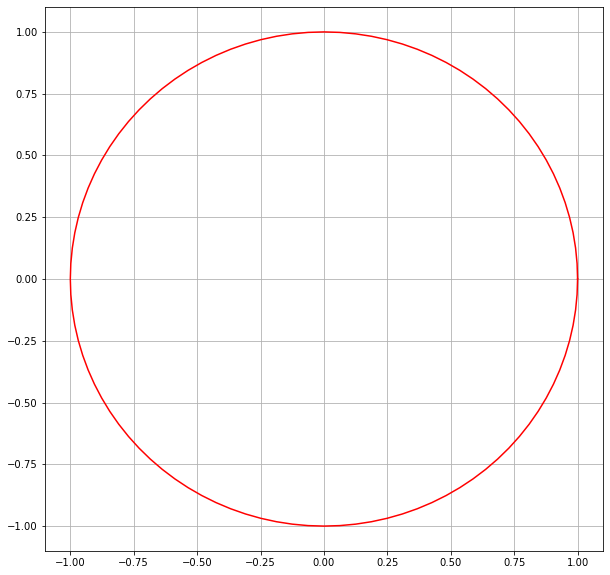

In [232]:
rr = np.linspace(0, 2 * np.pi, 101)
[xx, yy] = xy_circle(rr)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(xx, yy, 'r')
ax.grid()
plt.show()

Järgmisena defineerime kokkupõrkekujutust. Selleks me võime kasutada omadust et ringi keskpunkt $\vec{0}$ ja üksteisele järgnevad kokkupõrkepunktid $\vec{q}, \vec{q}'$ moodustavad võrdhaarset kolmnurka, mille nurkade summa rahuldab

$$\pi = r' - r + 2\varphi\,,$$

ja seega kehtib

$$r' = r + \pi - 2\varphi\,.$$

Lisaks tagame, et $-\pi \leq r' \leq \pi$. Kuna kolmnurk on võrdhaarne, järeldub lõpuks et $\varphi' = \varphi$.

In [233]:
def cm_circle(r0, phi0):
    r = r0 + np.pi - 2 * phi0
    phi = phi0
    while r > np.pi:
        r = r - 2 * np.pi
    while r < -np.pi:
        r = r + 2 * np.pi
    return [r, phi]

Siin on võimalik leida erinevaid trajektoore. Kui $\varphi_0 / \pi \in \mathbb{Q}$, tekib perioodiline trajektoor:

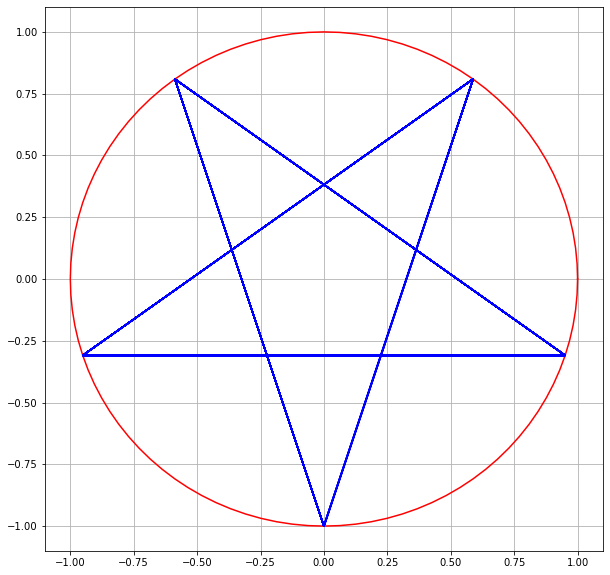

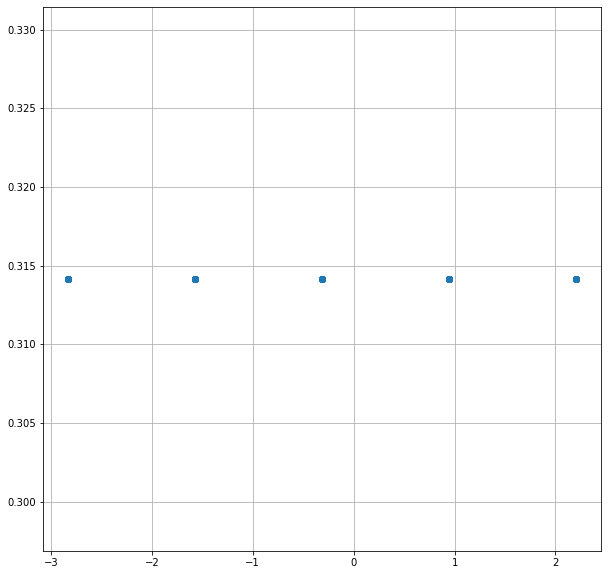

In [236]:
[cm, xy] = bounce(cm_circle, xy_circle, -np.pi / 2, np.pi / 10, 100)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(xx, yy, 'r')
ax.plot(xy[:, 0], xy[:, 1], 'b')
ax.grid()
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(cm[:, 0], cm[:, 1])
ax.grid()
plt.show()

Kui $\varphi_0 / \pi \notin \mathbb{Q}$, tekib mitteperioodiline trajektoor.

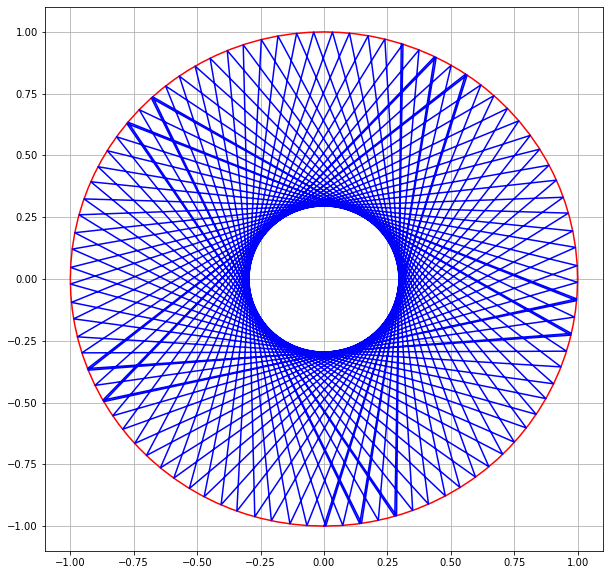

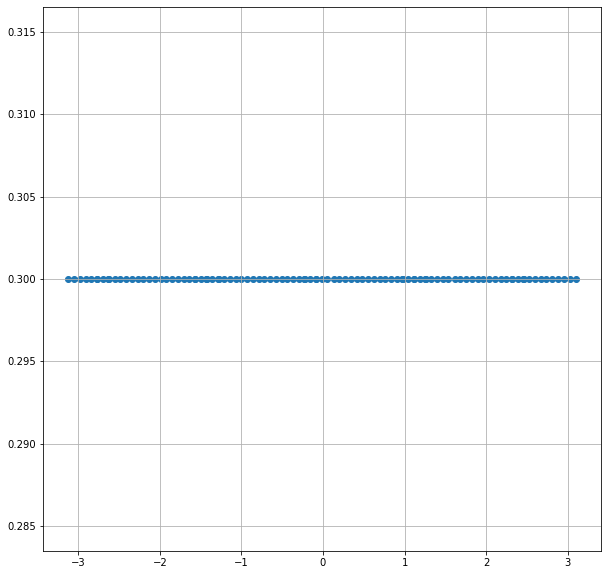

In [237]:
[cm, xy] = bounce(cm_circle, xy_circle, -np.pi / 2, 0.3, 100)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(xx, yy, 'r')
ax.plot(xy[:, 0], xy[:, 1], 'b')
ax.grid()
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(cm[:, 0], cm[:, 1])
ax.grid()
plt.show()

Lõpuks uurime kokkupõrkekujutust. Ülemine pilt näitab, et $r' = r + \pi - 2\varphi$, ja alumine näitab, et $\varphi' = \varphi$.

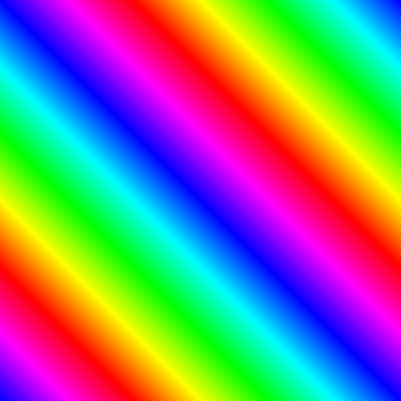

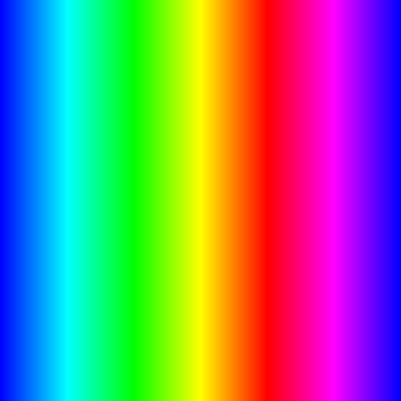

In [69]:
collmap(cm_circle, -np.pi, np.pi, 401, 401)

### Ruut

Järgmisena uurime ruudukujulist piljardlauda. Selleks defineerime rajakujutust, kus $r \in [0, 4)$. Siin täisosa $R = \lfloor r \rfloor \in \{0, 1, 2, 3\}$ määrab ruudu küljeid ja murdosa $\tilde{r} = r - \lfloor r \rfloor$ määrab positisiooni külje peal:

In [9]:
def xy_square(r):
    side = np.floor(r)
    off = r - side
    x = np.cos(side * np.pi / 2) - np.sin(side * np.pi / 2) * (2 * off - 1)
    y = np.sin(side * np.pi / 2) + np.cos(side * np.pi / 2) * (2 * off - 1)
    return [x, y]

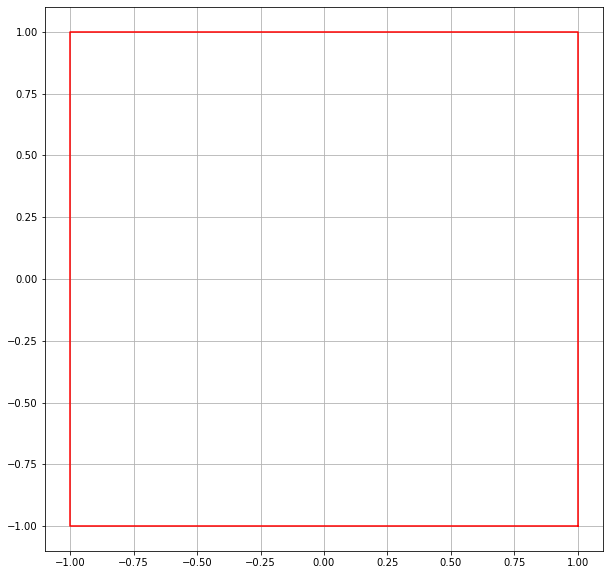

In [240]:
rr = np.linspace(0, 4, 5)
[xx, yy] = xy_square(rr)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(xx, yy, 'r')
ax.grid()
plt.show()

Eukleidilise geomeetria ja trigonomeetria abil saame kokkupõrkekujutust tuletada kolmel erineval juhul:

* Kui $\tilde{r} + \tan\varphi < 0$, tekib kokkupõrge vasakul seinal. Sel juhul kehtib $$R' = R + 3 \mod 4\,, \quad \tilde{r}' = 1 + \frac{\tilde{r}}{\tan\varphi}\,, \quad \varphi' = -\varphi - \frac{\pi}{2}\,.$$
* Kui $\tilde{r} + \tan\varphi > 1$, tekib kokkupõrge paremal seinal. Sel juhul kehtib $$R' = R + 1 \mod 4\,, \quad \tilde{r}' = \frac{1 - \tilde{r}}{\tan\varphi}\,, \quad \varphi' = -\varphi + \frac{\pi}{2}\,.$$
* Kui $0 < \tilde{r} + \tan\varphi < 1$, tekib kokkupõrge vastasseinal. Sel juhul kehtib $$R' = R + 2 \mod 4\,, \quad \tilde{r}' = 1 - \tilde{r} - \tan\varphi\,, \quad \varphi' = -\varphi\,.$$

In [238]:
def cm_square(r0, phi0):
    side0 = np.floor(r0)
    off0 = r0 - side0
    hit = off0 + np.tan(phi0)
    if hit > 1:
        side = (side0 + 1) % 4
        off = (1 - off0) / (hit - off0)
        phi = np.pi / 2 - phi0
    elif hit < 0:
        side = (side0 + 3) % 4
        off = 1 + off0 / (hit - off0)
        phi = -np.pi / 2 - phi0
    else:
        side = (side0 + 2) % 4
        off = 1 - hit
        phi = -phi0
    r = side + off
    return [r, phi]

Sellisel juhul on võimalik leida perioodilist trajektoori kui $\tan\varphi_0 \in \mathbb{Q}$:

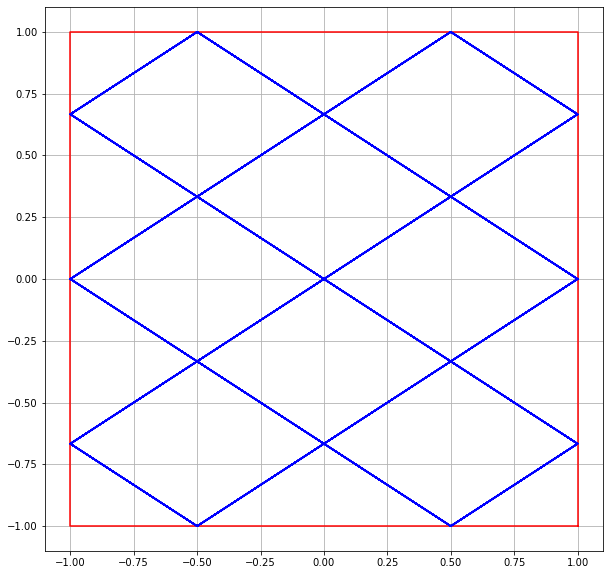

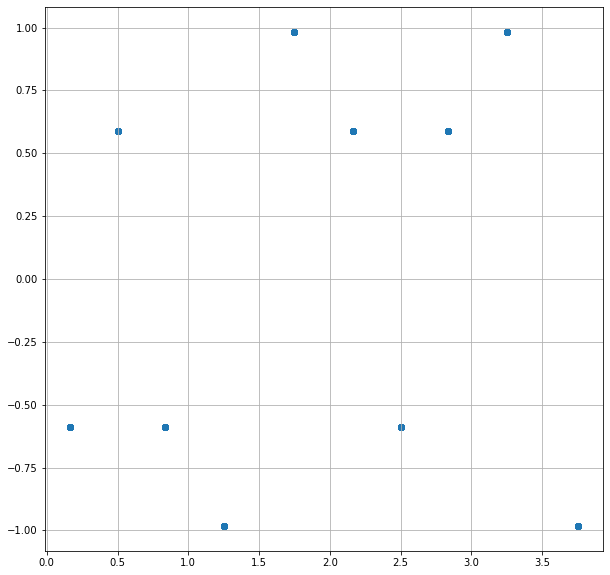

In [241]:
[cm, xy] = bounce(cm_square, xy_square, 0.5, np.arctan(2/3), 100)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(xx, yy, 'r')
ax.plot(xy[:, 0], xy[:, 1], 'b')
ax.grid()
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(cm[:, 0], cm[:, 1])
ax.grid()
plt.show()

Kui $\tan\varphi_0 \notin \mathbb{Q}$, tekib mitteperioodiline trajektoor:

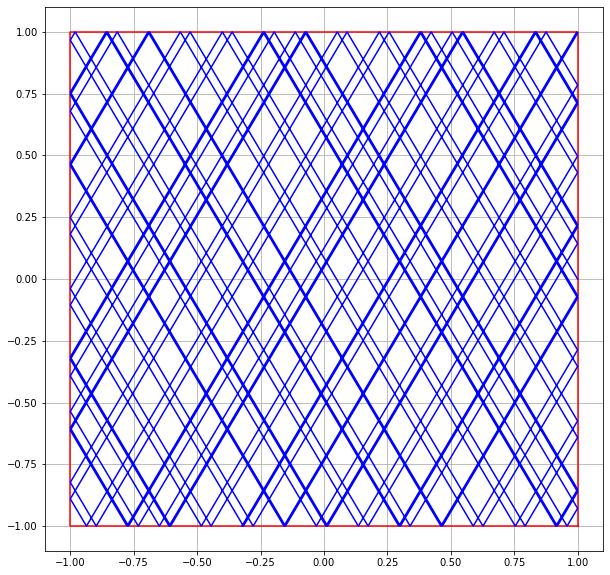

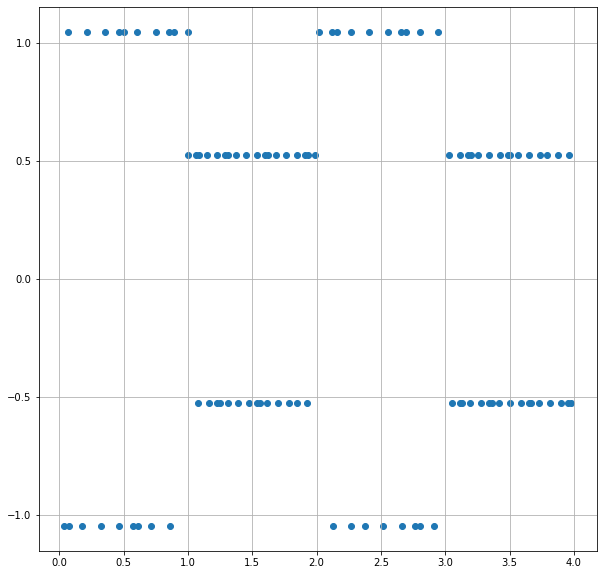

In [242]:
[cm, xy] = bounce(cm_square, xy_square, 0.5, np.pi / 3, 100)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(xx, yy, 'r')
ax.plot(xy[:, 0], xy[:, 1], 'b')
ax.grid()
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(cm[:, 0], cm[:, 1])
ax.grid()
plt.show()

Lõpuks joonistame ka kokkupõrkekujutust:

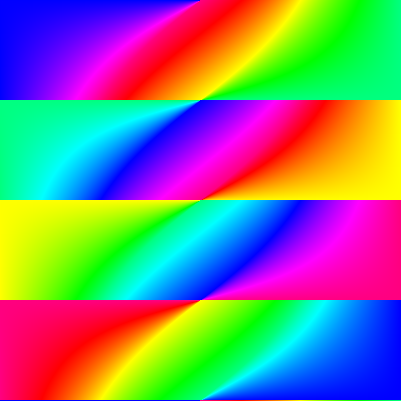

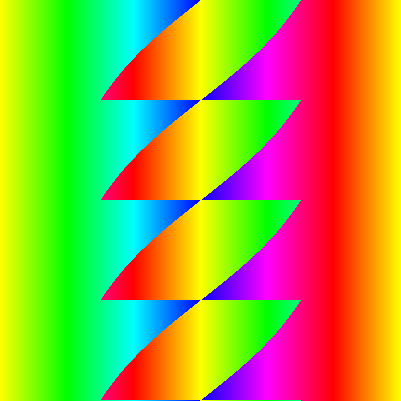

In [70]:
collmap(cm_square, 0, 4, 401, 401)

### Kolmnurk

Kolmnurga dünaamika on väga sarnane ruuduga. Sel juhul valime $r \in [0, 3)$, kus täisosa $R = \lfloor r \rfloor \in \{0, 1, 2\}$ määrab kolmnurga küljeid ja murdosa $\tilde{r} = r - \lfloor r \rfloor$ määrab positisiooni külje peal:

In [197]:
def xy_triangle(r):
    side = np.floor(r)
    off = r - side
    x = np.sin(side * 2 * np.pi / 3) + np.cos(side * 2 * np.pi / 3) * (2 * off - 1) * np.sqrt(3)
    y = -np.cos(side * 2 * np.pi / 3) + np.sin(side * 2 * np.pi / 3) * (2 * off - 1) * np.sqrt(3)
    return [x, y]

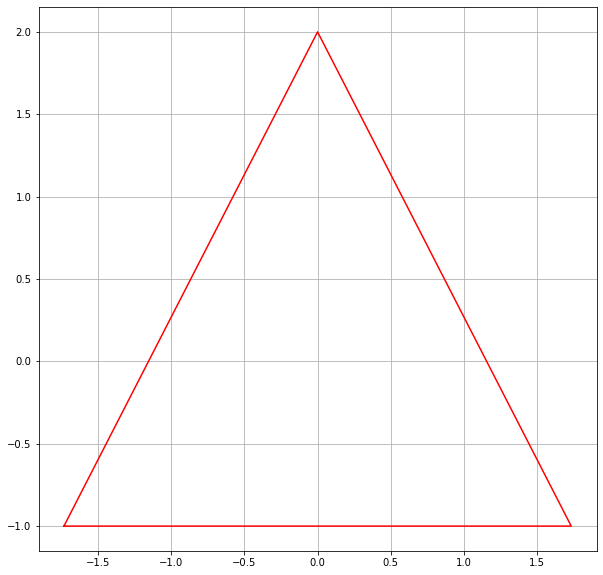

In [243]:
rr = np.linspace(0, 3, 4)
[xx, yy] = xy_triangle(rr)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(xx, yy, 'r')
ax.grid()
plt.show()

Kokkupõrkekujutust on samuti lihtne tuletada:

* Kui $2\tilde{r} - 1 + \sqrt{3}\tan\varphi < 0$, tekib kokkupõrge vasakul seinal. Sel juhul kehtib $$R' = R + 2 \mod 3\,, \quad \tilde{r}' = 1 - \tilde{r}\frac{\sqrt{3} + \tan\left(\frac{\pi}{6} + \varphi\right)}{\sqrt{3} - \tan\left(\frac{\pi}{6} + \varphi\right)}\,, \quad \varphi' = -\varphi - \frac{\pi}{3}\,.$$
* Kui $2\tilde{r} - 1 + \sqrt{3}\tan\varphi > 0$, tekib kokkupõrge paremal seinal. Sel juhul kehtib $$R' = R + 1 \mod 3\,, \quad \tilde{r}' = (1 - \tilde{r})\frac{\sqrt{3} + \tan\left(\frac{\pi}{6} - \varphi\right)}{\sqrt{3} - \tan\left(\frac{\pi}{6} - \varphi\right)}\,, \quad \varphi' = -\varphi + \frac{\pi}{3}\,.$$

In [218]:
def cm_triangle(r0, phi0):
    side0 = np.floor(r0)
    off0 = r0 - side0
    hit = (off0 - 0.5) * 2 + np.tan(phi0) * np.sqrt(3)
    if hit > 0:
        side = (side0 + 1) % 3
        off = (1 - off0) * (np.sqrt(3) + np.tan(np.pi / 6 - phi0)) / (np.sqrt(3) - np.tan(np.pi / 6 - phi0))
        phi = np.pi / 3 - phi0
    else:
        side = (side0 + 2) % 3
        off = 1 - off0 * (np.sqrt(3) + np.tan(np.pi / 6 + phi0)) / (np.sqrt(3) - np.tan(np.pi / 6 + phi0))
        phi = -np.pi / 3 - phi0
    r = side + off
    return [r, phi]

Kolmnurga puhul on lihtne leida perioodilisi trajektoore:

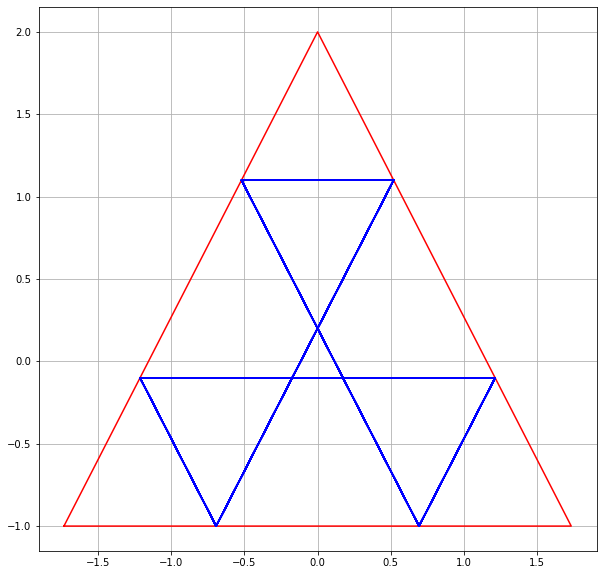

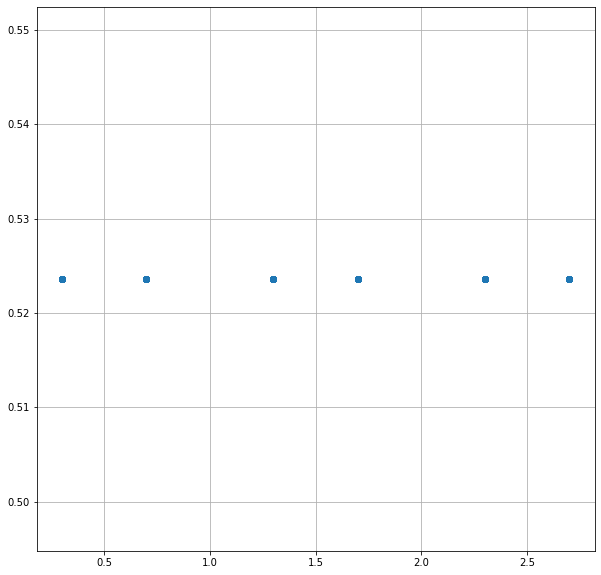

In [248]:
[cm, xy] = bounce(cm_triangle, xy_triangle, 0.7, np.pi / 6, 100)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(xx, yy, 'r')
ax.plot(xy[:, 0], xy[:, 1], 'b')
ax.grid()
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(cm[:, 0], cm[:, 1])
ax.grid()
plt.show()

Samuti on ka mitteperioodilised trajektoorid:

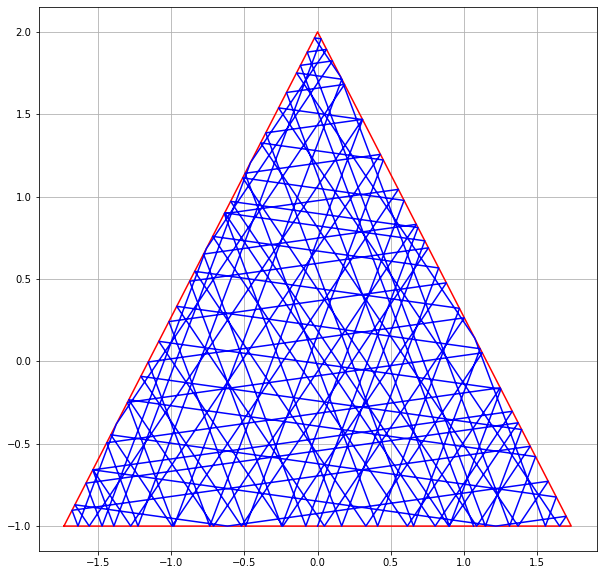

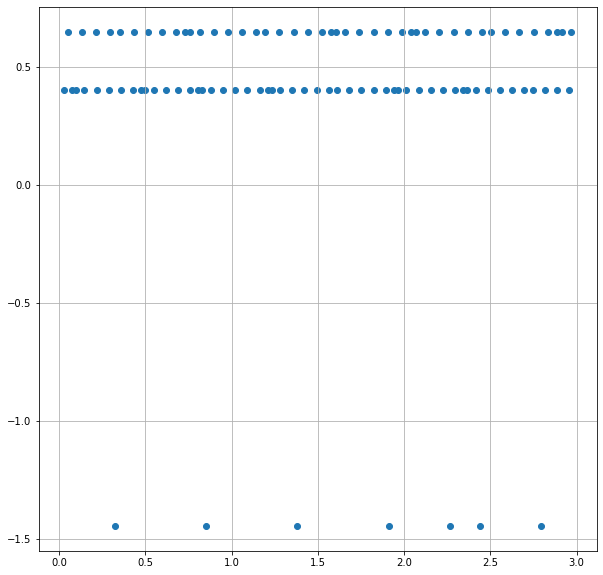

In [244]:
[cm, xy] = bounce(cm_triangle, xy_triangle, 0.5, 0.4, 100)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(xx, yy, 'r')
ax.plot(xy[:, 0], xy[:, 1], 'b')
ax.grid()
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(cm[:, 0], cm[:, 1])
ax.grid()
plt.show()

Lõpuks joonistame ka kokkupõrkekujutust:

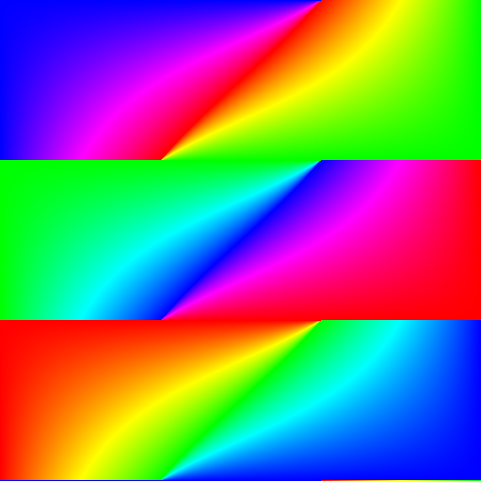

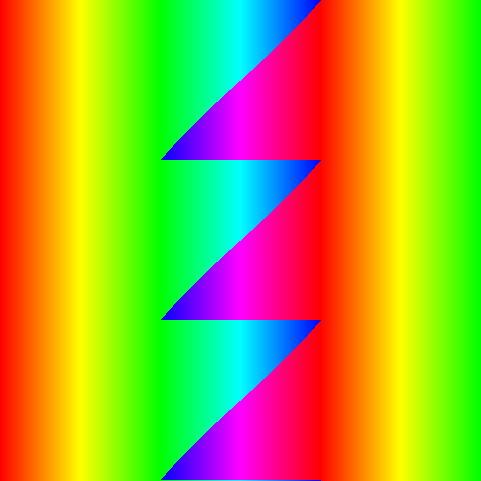

In [224]:
collmap(cm_triangle, 0, 3, 481, 481)

### Ellips

Järgmine piljardlaud mida me uurime on ellips. Rajakujutust võib defineerida kui

$$x = a\cos r\,, \quad y = b\sin r\,,$$

kus $a, b$ on poolteljed ja $r \in [-\pi, \pi]$:

In [178]:
aa = 2
bb = 1

def xy_ellipse(r):
    return [aa * np.cos(r), bb * np.sin(r)]

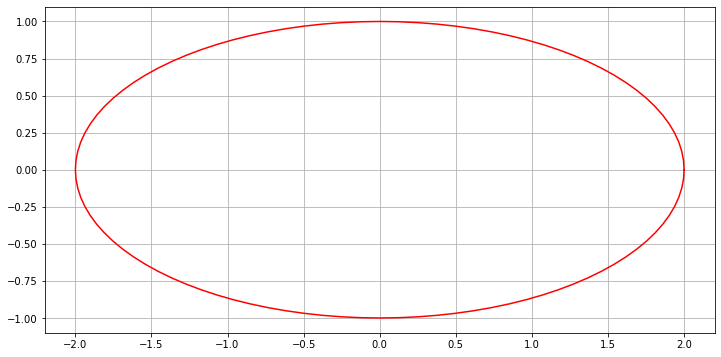

In [251]:
rr = np.linspace(0, 2 * np.pi, 101)
[xx, yy] = xy_ellipse(rr)

fig = plt.figure(figsize=[6 * aa, 6 * bb])
ax = fig.add_subplot(111)
ax.plot(xx, yy, 'r')
ax.grid()
plt.show()

Järgmisena tuletame kokkupõrkekujutust. Selleks defineerime puutujavektori

$$\vec{t} = (-a\sin r, b\cos r)$$

ja normaalivektori

$$\vec{n} = (-b\cos r, -a\sin r)\,.$$

Punktosake trajektoor on sirge läbi $\vec{q} = (a\cos r, b\sin r)$, mille suunavektor on

$$\vec{d} = \vec{n}\cos\varphi + \vec{t}\sin\varphi\,.$$

Järgmine kokkupõrkepunkt $\vec{q}' = (x', y')$ seega rahuldab

$$\vec{q}' = \vec{q} + s\vec{d}$$

mõne $s$ korral, ja asub ellipsi peal, seega

$$\frac{x'^2}{a^2} + \frac{y'^2}{b^2} = 1\,.$$

Kuna ka $\vec{q}$ asub ellipsi peal, on selles võrrandil lahend $s = 0$. Sellega jagades jääb lineaarne võrrand, mille lahend on

$$s = -2\frac{p_xd_xb^2 + p_yd_ya^2}{d_x^2b^2 + d_y^2a^2}\,.$$

Nüüd on lihtne leida rajapunkti, kus kehtib

$$\tan r' = \frac{ay}{bx}\,.$$

Lõpuks arvutame puutujavektori

$$\vec{t}' = (-a\sin r', b\cos r')\,,$$

mille abil leiame nurka $\varphi'$ kui

$$\sin\varphi' = \frac{\vec{d} \cdot \vec{t}'}{\|\vec{d}\| \|\vec{t}'\|}\,.$$

In [249]:
def cm_ellipse(r0, phi0):
    [x0, y0] = xy_ellipse(r0)
    xt0 = -aa * np.sin(r0)
    yt0 = bb * np.cos(r0)
    dx = xt0 * np.sin(phi0) - yt0 * np.cos(phi0)
    dy = yt0 * np.sin(phi0) + xt0 * np.cos(phi0)
    s = -2 * (x0 * dx * bb * bb + y0 * dy * aa * aa) / (dx * dx * bb * bb + dy * dy * aa * aa)
    x = x0 + s * dx
    y = y0 + s * dy
    r = np.arctan2(y / bb, x / aa)
    xt = -aa * np.sin(r)
    yt = bb * np.cos(r)
    phi = np.arcsin((xt * dx + yt * dy) / np.sqrt(xt * xt + yt * yt) / np.sqrt(dx * dx + dy * dy))
    return [r, phi]

Kõige lihtsamad trajektoorid on sirged. Esimene on vertikaalne:

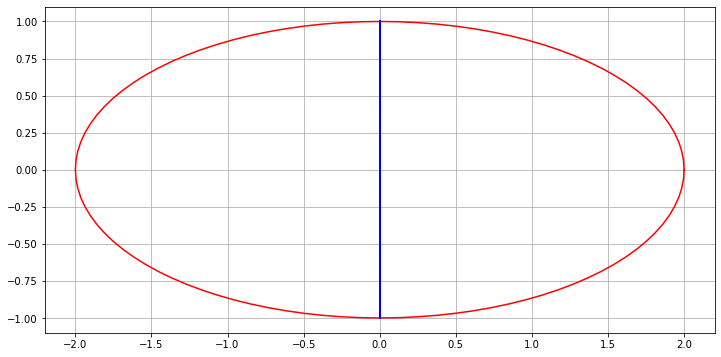

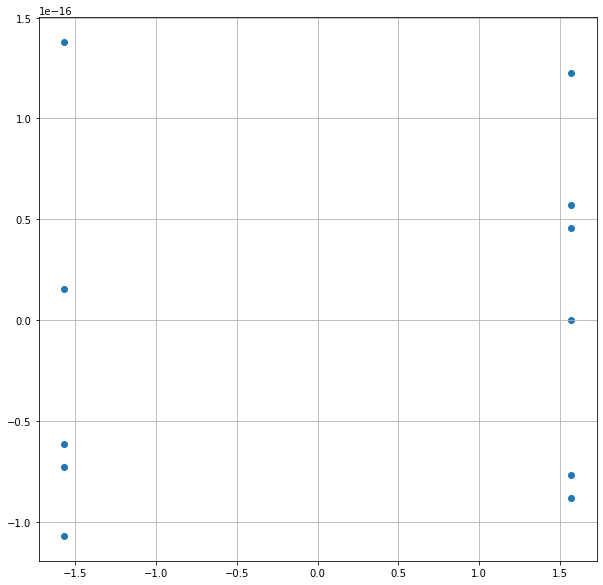

In [255]:
[cm, xy] = bounce(cm_ellipse, xy_ellipse, np.pi/2, 0, 10)

fig = plt.figure(figsize=[6 * aa, 6 * bb])
ax = fig.add_subplot(111)
ax.plot(xx, yy, 'r')
ax.plot(xy[:, 0], xy[:, 1], 'b')
ax.grid()
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(cm[:, 0], cm[:, 1])
ax.grid()
plt.show()

Teine on horisontaalne:

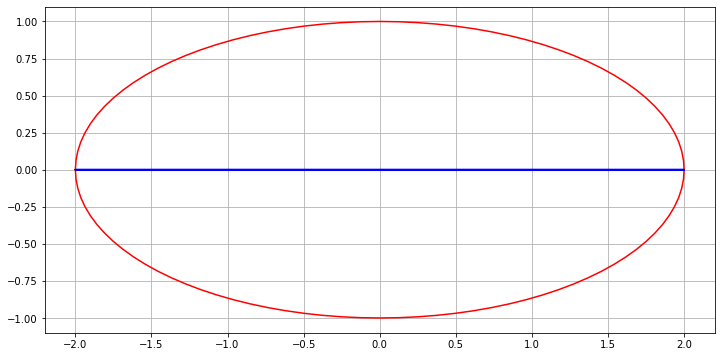

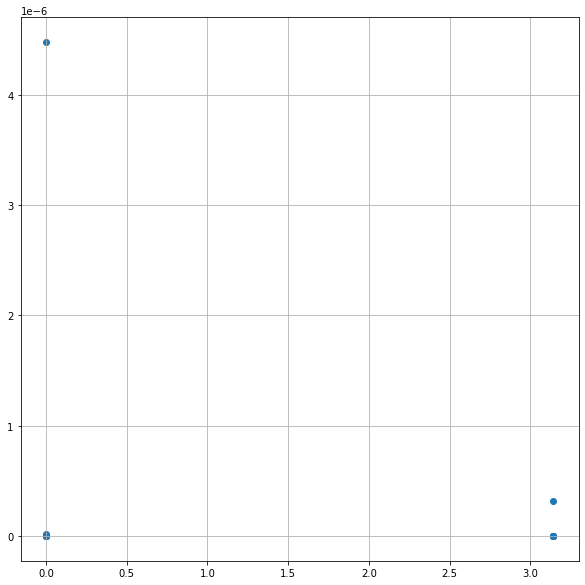

In [257]:
[cm, xy] = bounce(cm_ellipse, xy_ellipse, 0, 0, 10)

fig = plt.figure(figsize=[6 * aa, 6 * bb])
ax = fig.add_subplot(111)
ax.plot(xx, yy, 'r')
ax.plot(xy[:, 0], xy[:, 1], 'b')
ax.grid()
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(cm[:, 0], cm[:, 1])
ax.grid()
plt.show()

Lisaks leiame veel perioodilisi trajektoore:

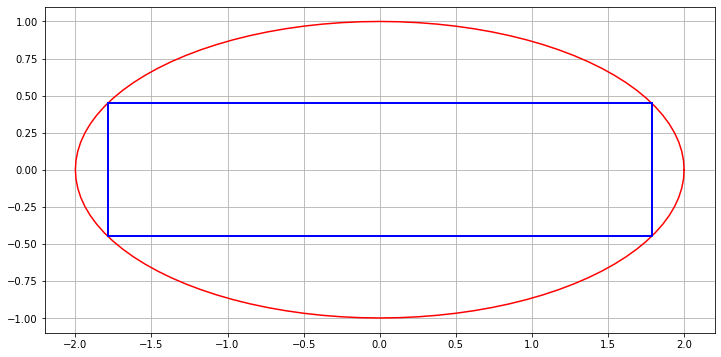

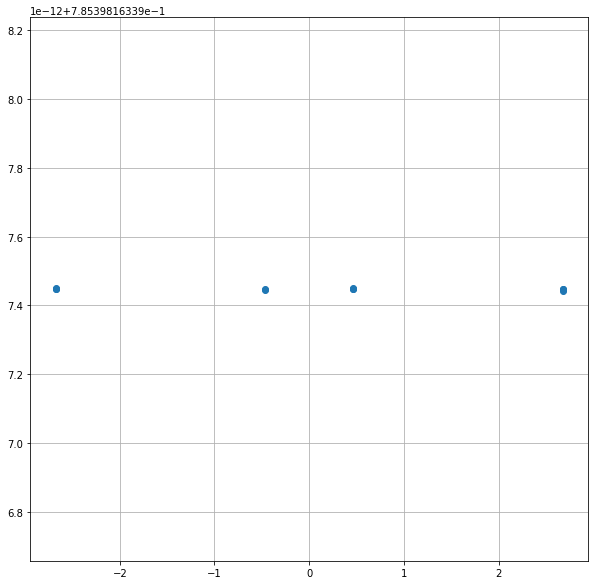

In [260]:
[cm, xy] = bounce(cm_ellipse, xy_ellipse, np.arctan(0.5), np.pi / 4, 10)

fig = plt.figure(figsize=[6 * aa, 6 * bb])
ax = fig.add_subplot(111)
ax.plot(xx, yy, 'r')
ax.plot(xy[:, 0], xy[:, 1], 'b')
ax.grid()
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(cm[:, 0], cm[:, 1])
ax.grid()
plt.show()

Üldiselt on 3 liiki trajektoore. Välised trajektoorid ei lõika lõiget fookuste vahel, ja tekib ellips kuhu trajektoorid ei satu:

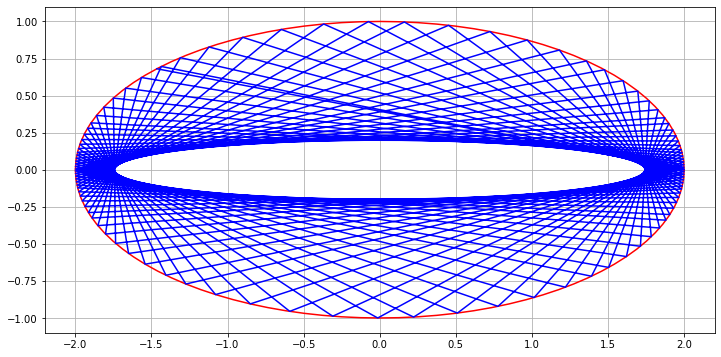

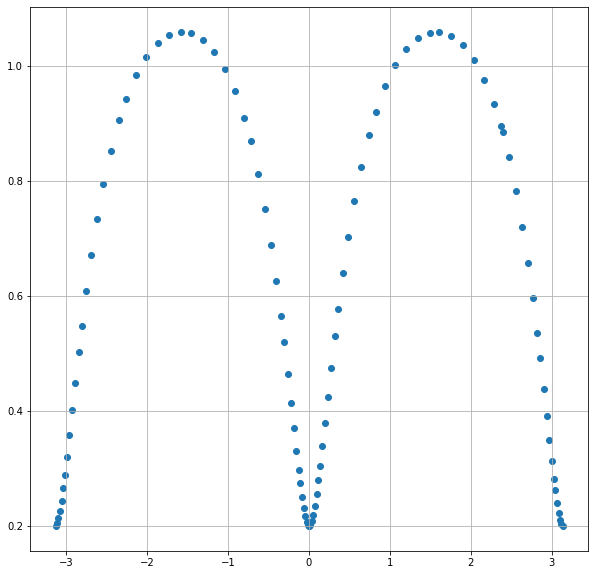

In [262]:
[cm, xy] = bounce(cm_ellipse, xy_ellipse, 0, 0.2, 100)

fig = plt.figure(figsize=[6 * aa, 6 * bb])
ax = fig.add_subplot(111)
ax.plot(xx, yy, 'r')
ax.plot(xy[:, 0], xy[:, 1], 'b')
ax.grid()
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(cm[:, 0], cm[:, 1])
ax.grid()
plt.show()

Kui trajektoor lõikab lõiget fookuste vajel, siis ta teeb seda iga kord kokkopõrgete vahel, ja ümbritsev joon on hüperbool:

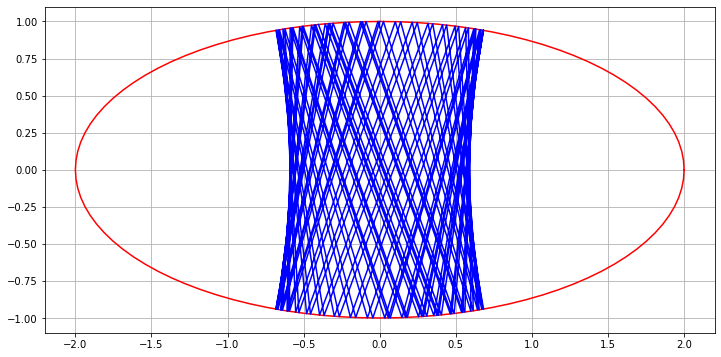

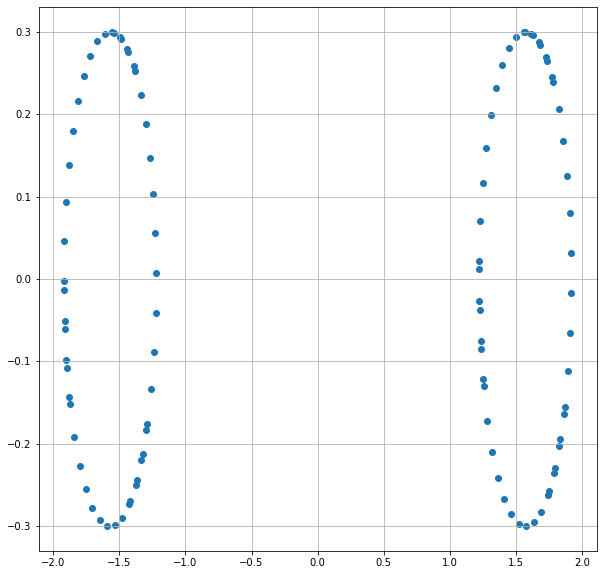

In [264]:
[cm, xy] = bounce(cm_ellipse, xy_ellipse, np.pi / 2, 0.3, 100)

fig = plt.figure(figsize=[6 * aa, 6 * bb])
ax = fig.add_subplot(111)
ax.plot(xx, yy, 'r')
ax.plot(xy[:, 0], xy[:, 1], 'b')
ax.grid()
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(cm[:, 0], cm[:, 1])
ax.grid()
plt.show()

Trajektoor, mis läbib fookust, läbib teist fookust pärast kokkupõrget, ja koondub horisontaaltelje peale:

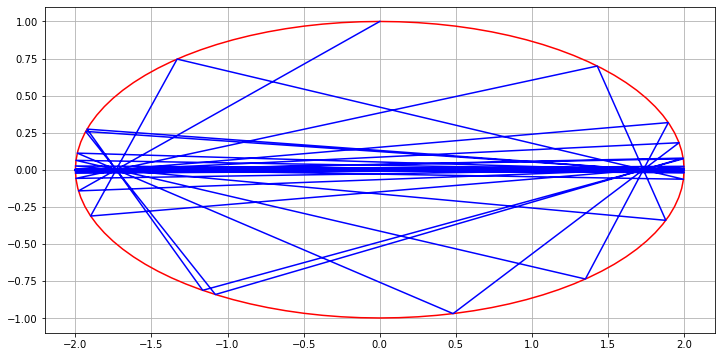

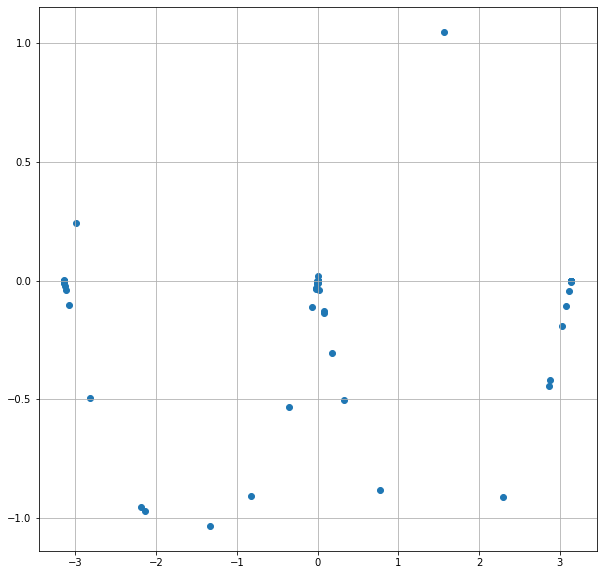

In [266]:
[cm, xy] = bounce(cm_ellipse, xy_ellipse, np.pi / 2, np.pi / 3, 100)

fig = plt.figure(figsize=[6 * aa, 6 * bb])
ax = fig.add_subplot(111)
ax.plot(xx, yy, 'r')
ax.plot(xy[:, 0], xy[:, 1], 'b')
ax.grid()
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(cm[:, 0], cm[:, 1])
ax.grid()
plt.show()

Kokkupõrkekujutus on järgnevalt:

/tmp/ipykernel_5234/959124615.py:16: RuntimeWarning: invalid value encountered in arcsin
  phi = np.arcsin((xt * dx + yt * dy) / np.sqrt(xt * xt + yt * yt) / np.sqrt(dx * dx + dy * dy))
/tmp/ipykernel_5234/4102161024.py:2: RuntimeWarning: invalid value encountered in remainder
  k = np.floor(1530 * x) % 1530


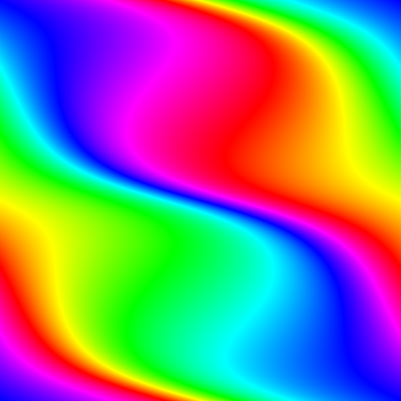

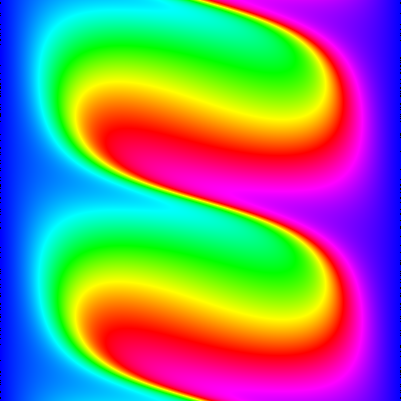

In [163]:
collmap(cm_ellipse, -np.pi, np.pi, 401, 401)

### Bunimovichi staadion

Väga lihtne ja samas väga huvitav piljardlaud on Bunimovichi staadion, mis koosneb ruudust ja kahes poolringist. Sel juhul valime $r \in [0, 4)$, kus täisosa $R = \lfloor r \rfloor \in \{0, 1, 2, 3\}$ määrab küljeid ja murdosa $\tilde{r} = r - \lfloor r \rfloor$ määrab positisiooni külje peal. Antud juhul $R \in \{0, 2\}$ on ümmargused ja $R \in \{1, 3\}$ on sirged:

In [116]:
def xy_stadium(r):
    side = np.floor(r)
    off = r - side
    x = np.cos(side * np.pi / 2) * (1 + np.sin(off * np.pi)) - np.sin(side * np.pi / 2) * (2 * off - 1)
    y = np.sin(side * np.pi / 2) - np.cos(side * np.pi / 2) * np.cos(off * np.pi)
    return [x, y]

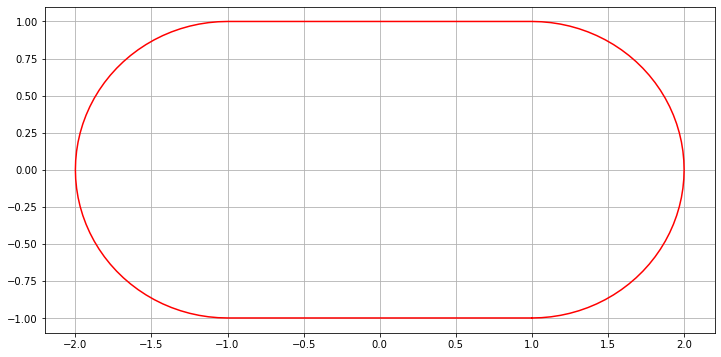

In [268]:
rr = np.linspace(0, 4, 201)
[xx, yy] = xy_stadium(rr)

fig = plt.figure(figsize=[12, 6])
ax = fig.add_subplot(111)
ax.plot(xx, yy, 'r')
ax.grid()
plt.show()

Kokkupõrkekujutus on tuletatav trigonomeetria abil:

In [183]:
def intersect(y0, theta0):
    m = np.tan(theta0)
    a = 1 + m * m
    b = 2 * y0 * m
    c = y0 * y0 - 1
    x = (np.sqrt(b * b - 4 * a * c) - b) / a / 2
    y = m * x + y0
    rho = np.arccos(-y)
    phi = theta0 + np.pi / 2 - rho
    return [rho / np.pi, phi]

def cm_stadium(r0, phi0):
    side0 = np.floor(r0)
    off0 = r0 - side0
    if side0 % 2: # Alustame sirgest.
        hit = off0 + np.tan(phi0)
        if hit > 1: # Paremale.
            side = (side0 + 1) % 4
            [off, phi] = intersect(2 * (1 - off0) / np.tan(phi0) - 1, np.pi / 2 - phi0)
        elif hit < 0: # Vasakule.
            side = (side0 + 3) % 4
            [off, phi] = intersect(1 + 2 * off0 / np.tan(phi0), -np.pi / 2 - phi0)
        else: # Vastasseinale.
            side = (side0 + 2) % 4
            off = 1 - hit
            phi = -phi0
    else: # Alustame ringjoonest.
        off = off0 + 1 - 2 * phi0 / np.pi
        if off <= 1 or off >= 2: # Sama ringjoon.
            if off >= 2:
                off = off - 2
            side = side0
            phi = phi0
        else:
            x = -np.sin(off0 * np.pi)
            y = np.cos(off0 * np.pi)
            theta0 = (off0 - 0.5) * np.pi - phi0
            y0 = y + (2 - x) * np.tan(theta0)
            if y0 > 1: # Vasakule.
                side = (side0 + 3) % 4
                off = 1 - ((1 - y) / np.tan(theta0) + x) / 2
                phi = theta0 - np.pi / 2
            elif y0 < -1: # Paremale.
                side = (side0 + 1) % 4
                off = (-(y + 1) / np.tan(theta0) + x) / 2
                phi = theta0 + np.pi / 2
            else: #Vastasseinale
                side = (side0 + 2) % 4
                [off, phi] = intersect(y0, theta0)
    r = side + off
    return [r, phi]

Trajektoorid on üldjuhul kaootilised.

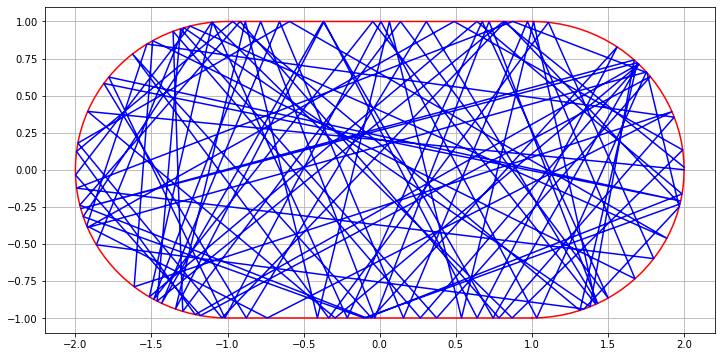

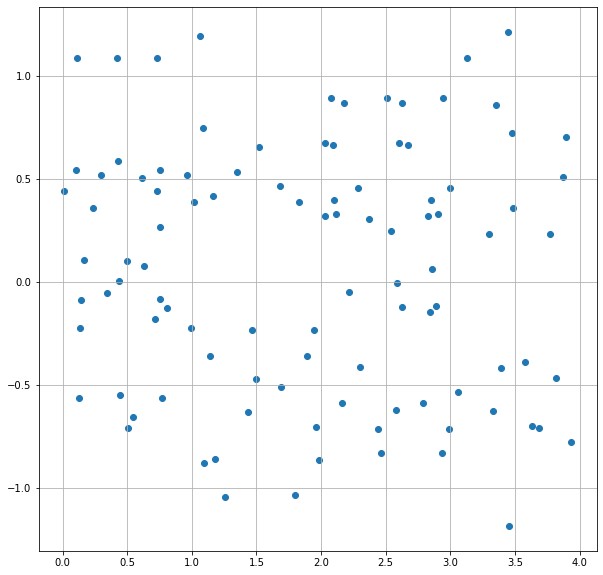

In [269]:
[cm, xy] = bounce(cm_stadium, xy_stadium, 0.5, 0.1, 100)

fig = plt.figure(figsize=[12, 6])
ax = fig.add_subplot(111)
ax.plot(xx, yy, 'r')
ax.plot(xy[:, 0], xy[:, 1], 'b')
ax.grid()
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(cm[:, 0], cm[:, 1])
ax.grid()
plt.show()

Lõpuks joonistame ka kokkupõrkekujutust:

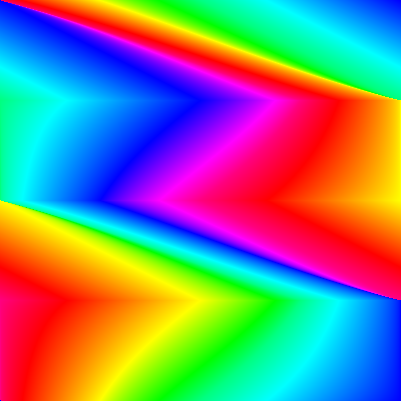

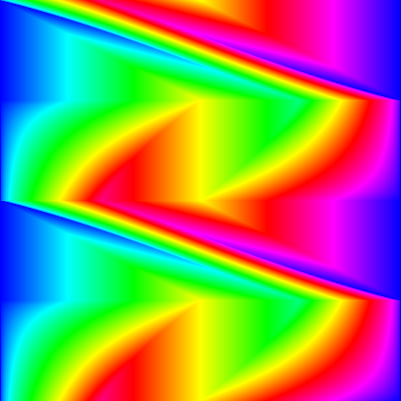

In [128]:
collmap(cm_stadium, 0, 4, 401, 401)